In [6]:
import pandas as pd
import numpy as np
from scipy import stats
!pip install mlxtend
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [7]:
kickstarters_2017=pd.read_csv("R:\Technocolabs\ks-projects-201801.csv")
kickstarters_2017

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


In [8]:
original_data=pd.DataFrame(kickstarters_2017.usd_goal_real)
scaled_data=minmax_scaling(original_data, columns=['usd_goal_real'])

In [10]:
print('Original data\nPreview:\n', original_data.head())
print('Minimum value:', float(original_data.min()),
      '\nMaximum value:', float(original_data.max()))
print('_'*30)

Original data
Preview:
    usd_goal_real
0        1533.95
1       30000.00
2       45000.00
3        5000.00
4       19500.00
Minimum value: 0.01 
Maximum value: 166361390.71
______________________________


In [11]:
print('\nScaled data\nPreview:\n', scaled_data.head())
print('Minimum value:', float(scaled_data.min()),
      '\nMaximum value:', float(scaled_data.max()))


Scaled data
Preview:
    usd_goal_real
0       0.000009
1       0.000180
2       0.000270
3       0.000030
4       0.000117
Minimum value: 0.0 
Maximum value: 1.0


In [14]:
# Scaling the goal column
original_goal_data=pd.DataFrame(kickstarters_2017.goal)
scaled_goal_data=minmax_scaling(original_goal_data,columns=['goal'])

In [22]:
print('original data \nPreview :',original_goal_data.head())
print('Minimum Value: ',float(original_goal_data.min()),'\nMaximum Value : ',float(original_goal_data.max()))

original data 
Preview :       goal
0   1000.0
1  30000.0
2  45000.0
3   5000.0
4  19500.0
Minimum Value:  0.01 
Maximum Value :  100000000.0


In [23]:
print('Scaled Data \nPreview : ',scaled_goal_data.head())
print('Maximum Value : ',float(scaled_goal_data.max()),'\nMinimum Value : ',float(scaled_goal_data.max()))

Scaled Data 
Preview :         goal
0  0.000010
1  0.000300
2  0.000450
3  0.000050
4  0.000195
Maximum Value :  1.0 
Minimum Value :  1.0


In [24]:
# Normalization
index_of_positive_pledges=kickstarters_2017.usd_pledged_real > 0

In [25]:
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

In [26]:
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0], 
                               name='usd_pledged_real', index=positive_pledges.index)

In [28]:
print('Original data\nPreview:\n', positive_pledges.head())
print('Minimum value:', float(positive_pledges.min()),
      '\nMaximum value:', float(positive_pledges.max()))

Original data
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64
Minimum value: 0.45 
Maximum value: 20338986.27


In [29]:
print('\nNormalized data\nPreview:\n', normalized_pledges.head())
print('Minimum value:', float(normalized_pledges.min()),
      '\nMaximum value:', float(normalized_pledges.max()))


Normalized data
Preview:
 1    10.165142
2     6.468598
3     0.000000
4     9.129277
5    15.836853
Name: usd_pledged_real, dtype: float64
Minimum value: -0.7779954122762203 
Maximum value: 30.69054020451361


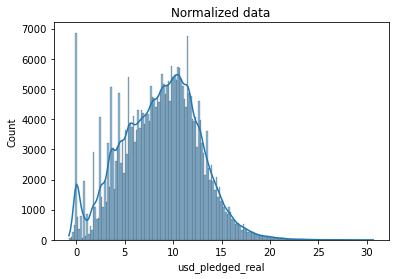

In [30]:
#plotting
ax = sns.histplot(normalized_pledges, kde=True)
ax.set_title("Normalized data")
plt.show()

In [31]:
index_pledges=kickstarters_2017.pledged > 0
positive=kickstarters_2017.pledged.loc[index_pledges]
normalized=pd.Series(stats.boxcox(positive)[0],
                    name='pledged', index=positive.index)

In [32]:
print('Original Data\nPreview :',positive.head())
print('Maximum Value : ',float(positive.max()),
     '\nMinimum Value : ',float(positive.min()))

Original Data
Preview : 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: pledged, dtype: float64
Maximum Value :  20338986.27 
Minimum Value :  1.0


In [33]:
print('Normalized Data \nPreview :',normalized.head())
print('Maximum Value : ',float(normalized.max()),
     '\nMinimum Value : ',float(normalized.min()))

Normalized Data 
Preview : 1    10.013887
2     6.403367
3     0.000000
4     9.005193
5    15.499596
Name: pledged, dtype: float64
Maximum Value :  29.63030787418848 
Minimum Value :  0.0


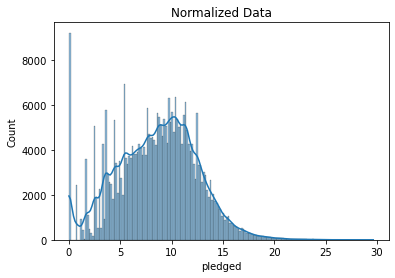

In [35]:
NO = sns.histplot(normalized, kde=True)
NO.set_title("Normalized Data")
plt.show()